In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
y = np.array(
    [
        26.0,
        35.0,
        30,
        25,
        44,
        30,
        33,
        43,
        22,
        43,
        24,
        19,
        39,
        31,
        25,
        28,
        35,
        30,
        26,
        31,
        41,
        36,
        26,
        35,
        33,
        28,
        27,
        34,
        27,
        22,
    ]
)

In [4]:
y_bar = np.mean(y)
print(y_bar)

30.933333333333334


In [5]:
sigma = np.std(y)
sigma

6.495810615739622

In [6]:
def gaussian(y, m, s):
    l = np.prod(stats.norm.pdf(y, loc=m, scale=s))
    return l

In [7]:
x_axis = np.arange(18, 38, 0.01)
s = np.std(y)
like = [gaussian(y, val, s) for val in x_axis]
l = like / np.sum(like) * 100

In [8]:
def mu_post(sigma_0, mu_0, sigma, ybar, n):
    return (1 / sigma_0**2 * mu_0 + n / sigma**2 * ybar) / (
        1 / sigma_0**2 + n / sigma**2
    )

In [9]:
mu_0 = 30  # media della distribuzione a priori per mu
sigma_0 = 5  # sd della distribuzione a priori per mu
sigma = np.std(y)  # sd del campione (assunta essere sigma)
ybar = np.mean(y)  # media del campione
n = len(y)

mu_post(sigma_0, mu_0, sigma, ybar, n)

30.883620206009738

In [10]:
def sigma_post(sigma_0, sigma, n):
    return np.sqrt(1 / (1 / sigma_0**2 + n / sigma**2))

In [11]:
sigma = np.std(y)  # sd del campione (assunta essere sigma)
n = len(y)

sigma_post(sigma_0, sigma, n)

1.1539504429303373

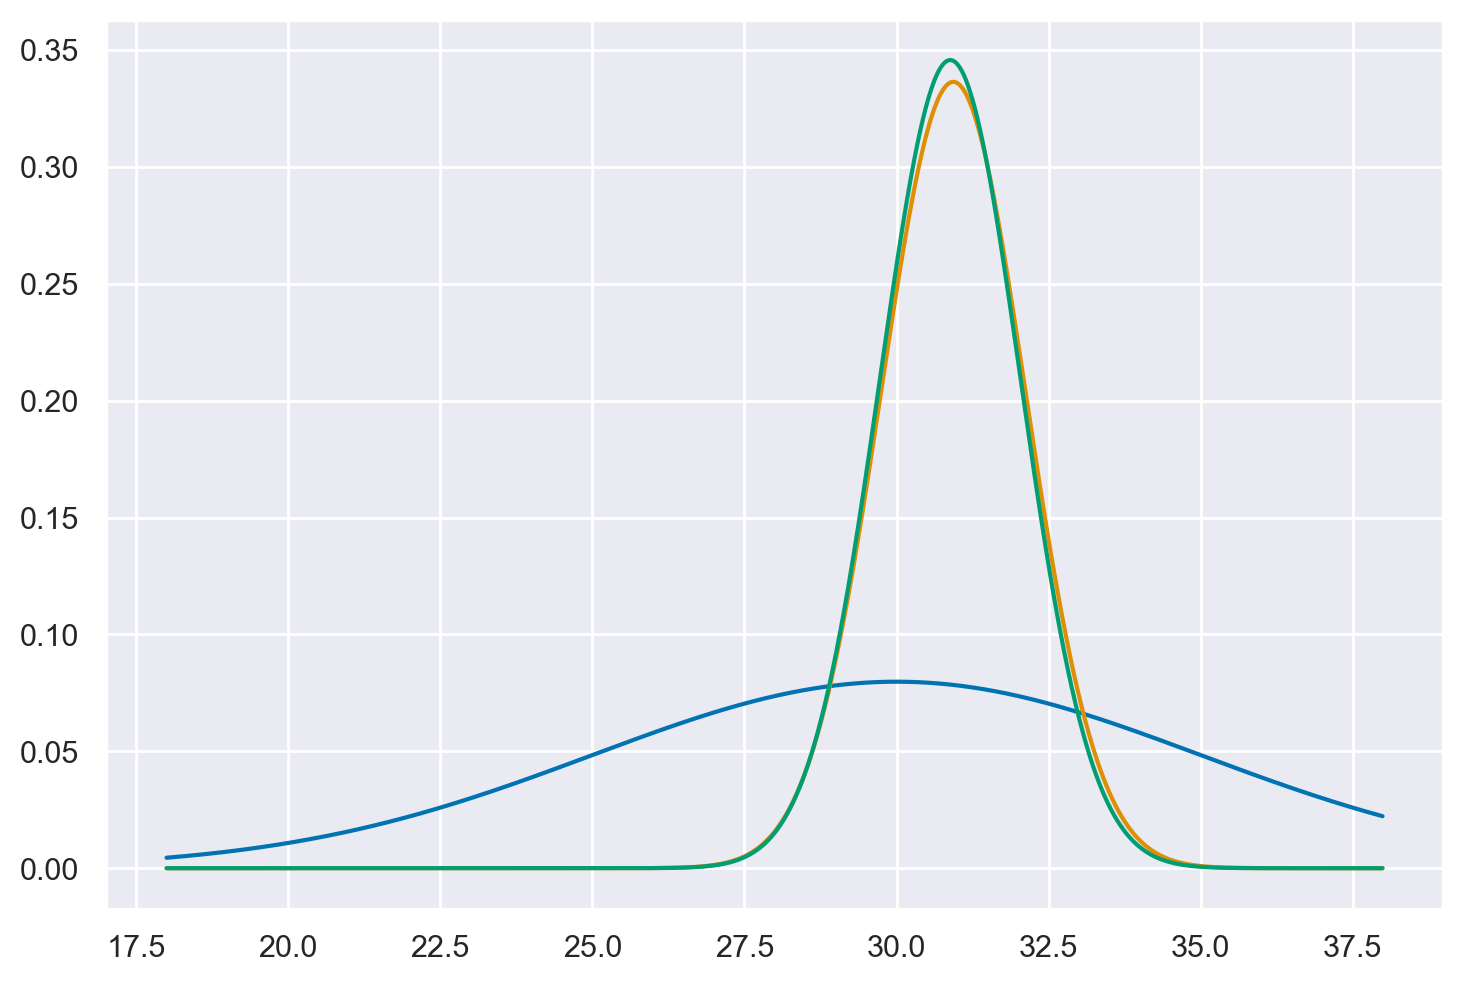

In [12]:
plt.plot(x_axis, stats.norm.pdf(x_axis, mu_0, sigma_0))
plt.plot(x_axis, l)
_ = plt.plot(
    x_axis,
    stats.norm.pdf(
        x_axis, mu_post(sigma_0, mu_0, sigma, ybar, n), sigma_post(sigma_0, sigma, n)
    ),
)

In [13]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Tue Jan 23 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pytensor: 2.18.4

seaborn   : 0.13.0
scipy     : 1.11.4
pandas    : 2.1.4
matplotlib: 3.8.2
numpy     : 1.26.2
arviz     : 0.17.0

Watermark: 2.4.3

